In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

In [54]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5

# Initial regression
model = LinearRegression()
model.fit(x, y)
model.coef_, model.intercept_

(array([ 0.99516475]), 0.0039075222081016436)

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
x_train, y_train

(array([[ 0.90950495],
        [ 0.72039604],
        [ 0.88871287],
        ..., 
        [ 0.17118812],
        [ 0.3250495 ],
        [ 0.38811881]]),
 array([ 0.92759901,  0.54963051,  1.27353598, ...,  0.40475791,
         0.13950282, -0.04057883]))

In [10]:
x_train.shape, y_train.shape

((5000, 1), (5000,))

In [25]:
# Regression with training set
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 1.01088711]), -0.0093269828910375607)

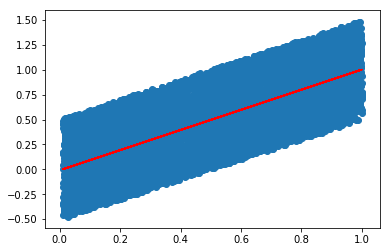

In [26]:
# plot
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, color='red')

In [17]:
# Mean Squared Error
error_train = mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)
error_test = mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

error_test, error_train, (error_test - error_train)

(0.081344527744474024, 0.083403235716328253, -0.0020587079718542289)

## 2.  Repeat #1 for a Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

In [20]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 1.00387297]), -0.011437404267510276)

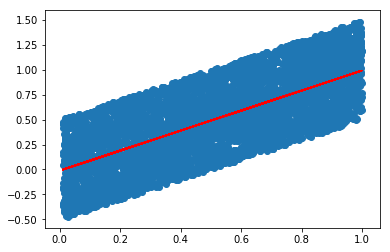

In [21]:
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, color='red')

In [22]:
error_test = mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)
error_train = mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

error_test, error_train, (error_test - error_train)

(0.081342655545708367, 0.083403732820869575, -0.0020610772751612078)

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
np.linspace(0.01, 0.99, 10)

array([ 0.01      ,  0.11888889,  0.22777778,  0.33666667,  0.44555556,
        0.55444444,  0.66333333,  0.77222222,  0.88111111,  0.99      ])

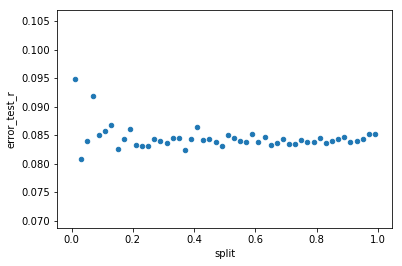

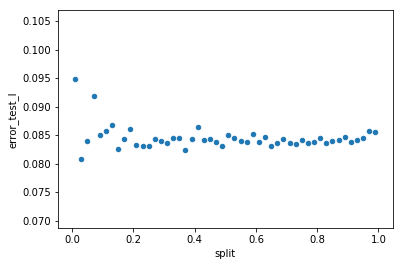

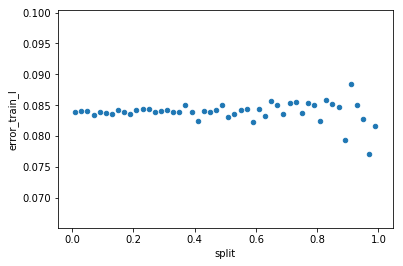

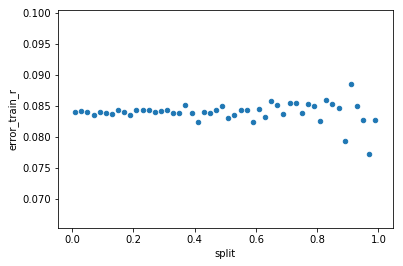

In [43]:
# loop over all splits
splits = np.linspace(0.01, 0.99, 50)
data = []
for split in splits:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    
    model_l = LinearRegression()
    model_l.fit(x_train, y_train)
    model_l.coef_, model_l.intercept_
    # ridge 
    model_r = Ridge()
    model_r.fit(x_train, y_train)
    model_r.coef_, model_r.intercept_
    # MSE linear
    error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
    error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

    error_test_l, error_train_l, (error_test_l - error_train_l)
    # MSE ridge
    error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
    error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

#     error_test_r, error_train_r, (error_test_r - error_train_r)
    
    
    data.append({
        'split':split,
        'error_test_l':error_test_l,
        'error_test_r':error_test_r,
        'error_train_l': error_train_l,
        'error_train_r': error_train_r})

data = pd.DataFrame(data)
data.head()
   
tags = [
    'error_test_r',
    'error_test_l',
    'error_train_l',
    'error_train_r'
]
for tag in tags:
    data.plot('split', tag, kind='scatter')


# Summary

The above plots display the MSE of both the linear and ridge regressions with 50 bins. The execution was grouped into a for loop for simplicity, but broken out into each individual split for 10 selected splits below. For the training sets, error appears to become more volatile as the split size increases. Conversely, for the testing sets became less volatile approaching 1. 

# 1. Split = 0.25

In [79]:
# 1 split = .25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [80]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 1.00291161]), -0.0045002088556785891)

In [81]:
# ridge 
model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 1.00127463]), -0.0036723402651291925)

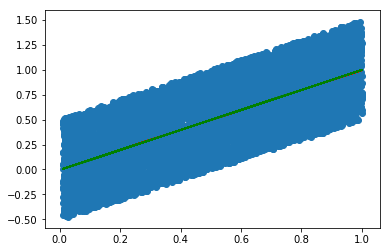

In [82]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [83]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.08345549606083473, 0.081950477698681662, 0.0015050183621530683)

In [84]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.083456284838548014, 0.081950696241242085, 0.0015055885973059291)

# 2. Split = 0.30

In [85]:
# split = .30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [86]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 1.00258162]), -0.0054552315494936776)

In [87]:
# ridge 

model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 1.0008422]), -0.0045762078712859866)

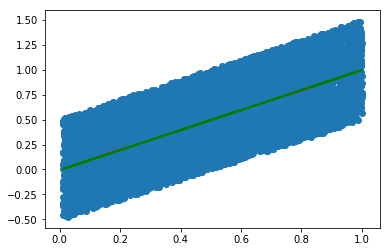

In [88]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [89]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.081082554410062568, 0.082863006191233254, -0.001780451781170686)

In [90]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.081083611201055603, 0.082863254887928992, -0.0017796436868733889)

# 3 split = 0.35

In [91]:
# plit = .35
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35)

In [92]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 1.01497895]), -0.015962554482942481)

In [93]:
# ridge 

model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 1.01307587]), -0.015005691357185102)

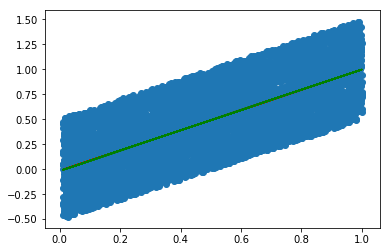

In [94]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [95]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.081510421406052247, 0.082833503322207083, -0.0013230819161548363)

In [96]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.081500608448399237, 0.082833799931206514, -0.0013331914828072777)

# 4 split = 0.4

In [11]:
# split = .4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4)

In [12]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 0.99498533]), 0.0014573072033993162)

In [13]:
# ridge 

model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.99294451]), 0.0024906790197232187)

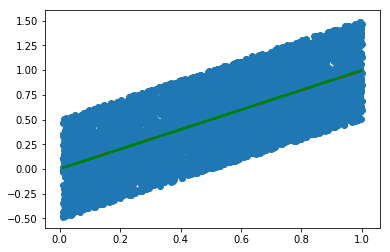

In [14]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [15]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.084330139147583222, 0.082612713577545877, 0.0017174255700373453)

In [16]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.08432330814378125, 0.082613051314431057, 0.001710256829350193)

# 5 split = 0.45

In [102]:
# split = .45
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.45)

In [103]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 0.99977416]), -0.0028867146717420633)

In [104]:
# ridge 

model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model.intercept_

(array([ 0.99755541]), 0.021594324242331264)

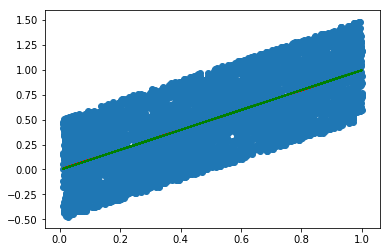

In [105]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [106]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.081891989200816848, 0.082684353684434622, -0.00079236448361777456)

In [107]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.081895351774552025, 0.082684756107365767, -0.00078940433281374234)

# 6 split = 0.55

In [108]:
# split = .55
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.55)

In [109]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 0.99358423]), 0.0032592518411875826)

In [110]:
# ridge 
model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.99086691]), 0.0046281700138917081)

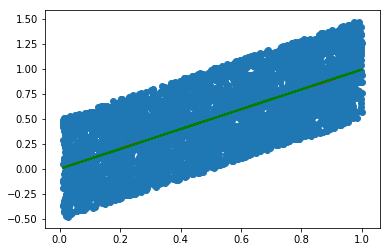

In [111]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [112]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.081777829158195051, 0.083030790498059864, -0.0012529613398648137)

In [113]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.081786364955572691, 0.083031388831827604, -0.0012450238762549137)

# 7 split = 0.6

In [223]:
# split = .6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.6)

In [224]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 1.00214698]), -0.0028383966551119855)

In [225]:
# ridge 
model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.99910776]), -0.0012988611853768095)

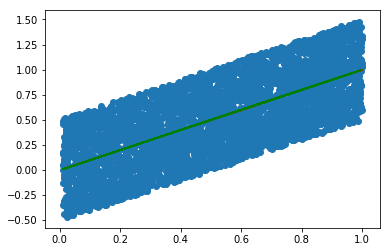

In [226]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [227]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.082146847717331897, 0.082598518625609837, -0.00045167090827794021)

In [228]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082148689034874711, 0.082599277754346362, -0.00045058871947165069)

# 8 split = 0.65

In [120]:
# split = .65
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.65)

In [121]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 0.99549528]), -0.0065649052199639457)

In [122]:
# ridge 
model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.99199938]), -0.0047862833400262317)

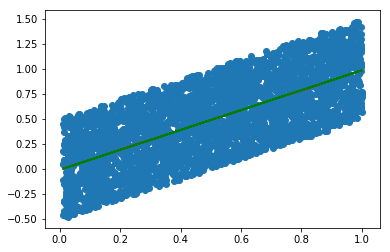

In [123]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [124]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.082909764809568423, 0.081367559518767715, 0.0015422052908007078)

In [125]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082917503478620938, 0.081368550357100597, 0.0015489531215203411)

# 9 split = 0.7

In [126]:
# split = .7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.7)

In [127]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 1.00447505]), -0.0021889600085946981)

In [128]:
# ridge 
model_r = Ridge()
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 1.00026494]), -4.6089377216507188e-05)

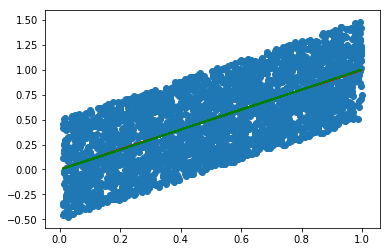

In [129]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [130]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.082062843540077715, 0.082966969041628313, -0.00090412550155059834)

In [131]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.08206343081540525, 0.082968372783763136, -0.00090494196835788632)

# 10 split = .75

In [217]:
# split = .75
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.75)

In [218]:
# linear
model_l = LinearRegression()
model_l.fit(x_train, y_train)
model_l.coef_, model_l.intercept_

(array([ 0.99025683]), -0.0045314266486700672)

In [219]:
# ridge 
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 0.98549144]), -0.002141639611790036)

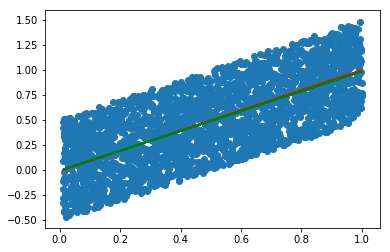

In [220]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [221]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.082547320224973825, 0.081905978560970358, 0.00064134166400346693)

In [222]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082463906414840277, 0.081942812705241272, 0.00052109370959900481)

# Plot errors vs split

In [47]:
import pandas as pd

splits = pd.read_csv('../data/splits.csv', skipinitialspace=True)
splits.head()

,split,error_test_l,error_train_l,diff_l,error_test_r,error_train_r,diff_r
0,0.25,0.083455,0.081950,0.001505,0.083456,0.081951,0.001506
1,0.30,0.081083,0.082863,-0.001780,0.081084,0.082863,-0.001780
2,0.35,0.081510,0.082834,-0.001323,0.081501,0.082834,-0.001333
3,0.40,0.084330,0.082613,0.001717,0.084323,0.082613,0.001710
4,0.45,0.081892,0.082684,-0.000792,0.081895,0.082685,-0.000789


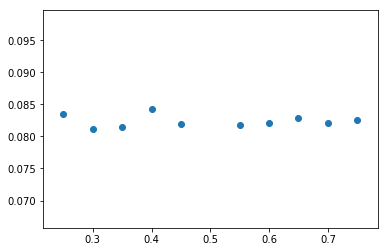

In [48]:
x = splits['split']
y = splits['error_test_l']
plt.scatter(x,y)

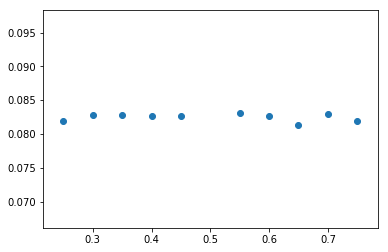

In [50]:
x = splits['split']
y = splits['error_train_l']
plt.scatter(x,y)

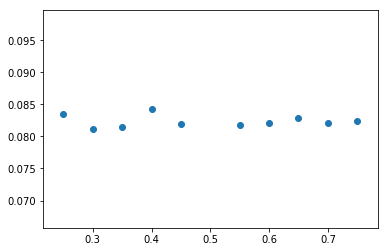

In [51]:
x = splits['split']
y = splits['error_test_r']
plt.scatter(x,y)

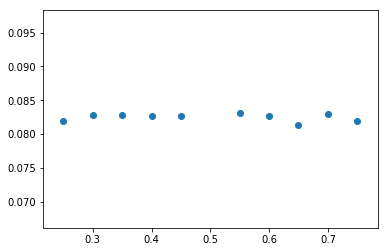

In [52]:
x = splits['split']
y = splits['error_train_r']
plt.scatter(x,y)

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

In [138]:
# Ideal split size is truly arbitrary, since the margin of error has little variation. I will be using split = 0.6
# since the error for the train vs test is the smallest

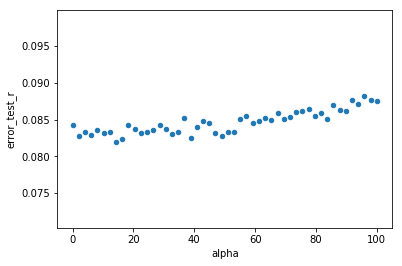

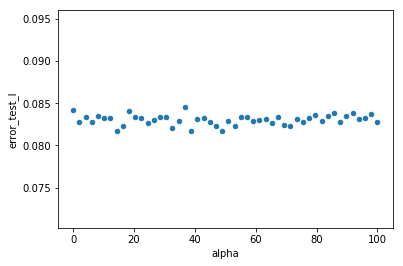

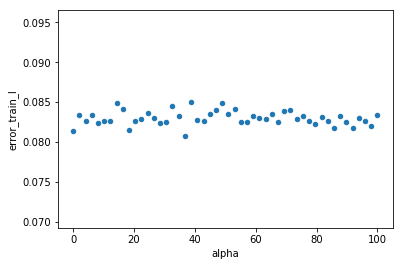

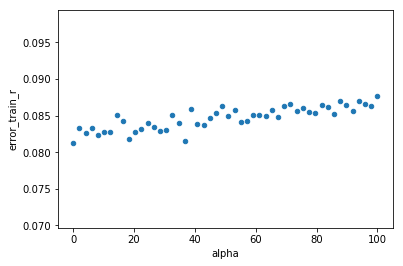

In [56]:
# loop over all splits
split = 0.6
alphas = np.linspace(0,100, 50)
data = []
for alpha in alphas:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    
    model_l = LinearRegression()
    model_l.fit(x_train, y_train)
    model_l.coef_, model_l.intercept_
    # ridge 
    model_r = Ridge(alpha=alpha)
    model_r.fit(x_train, y_train)
    model_r.coef_, model_r.intercept_
    # MSE linear
    error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
    error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

    error_test_l, error_train_l, (error_test_l - error_train_l)
    # MSE ridge
    error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
    error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

#     error_test_r, error_train_r, (error_test_r - error_train_r)
    
    
    data.append({
        'alpha':alpha,
        'error_test_l':error_test_l,
        'error_test_r':error_test_r,
        'error_train_l': error_train_l,
        'error_train_r': error_train_r})

data = pd.DataFrame(data)
data.head()
   
tags = [
    'error_test_r',
    'error_test_l',
    'error_train_l',
    'error_train_r'
]
for tag in tags:
    data.plot('alpha', tag, kind='scatter')


# Summary
Again, the above plots were placed in a for loop and stored to a file for simplicity. The alphas were varied into 50 bins for plotting. The data is underfitting to the model. The error for ridge regressions generally increases as alpha approaches 100, with more volatility at the beginning, whereas the linear regression remains relatively stable as alphas approach 100, which makes sense. The below plots are selected alphas between 2-5 with generated errors.

# Alpha = 2

In [239]:
# split = .6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.6)

In [240]:
# ridge 
model_r = Ridge(alpha=2)
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.98221721]), 0.0031808077698369241)

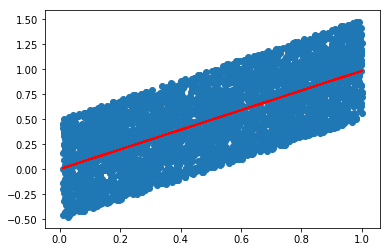

In [241]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')

In [242]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082403511048295477, 0.082327927042620139, 7.5584005675338739e-05)

# Alpha = 3

In [264]:
# ridge 
model_r = Ridge(alpha=3)
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.97928324]), 0.0046679745592271282)

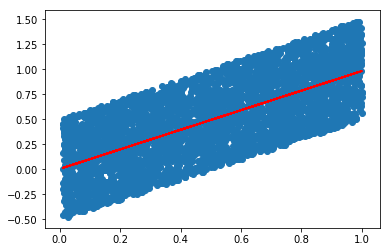

In [265]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')

In [266]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.08241918895374567, 0.082331522824764664, 8.7666128981006564e-05)

# Alpha = 4

In [267]:
# ridge 
model_r = Ridge(alpha=4)
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.97636675]), 0.0061462832261642841)

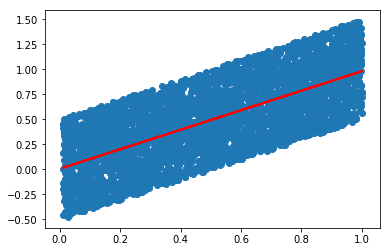

In [268]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')

In [269]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082436153212092994, 0.082336512439091195, 9.9640773001799521e-05)

# Alpha = 5

In [270]:
# ridge 
model_r = Ridge(alpha=5)
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.97346758]), 0.0076158126790871195)

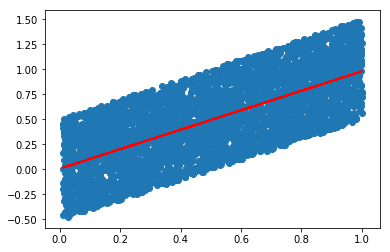

In [271]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')

In [272]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.082454380110224157, 0.082342870899640305, 0.00011150921058385166)

# Summary

The mean squared error was at its lowest with alpha = 2, at 7.5584005675338739e-05. The error increased slightly at alpha = 3, and then significantly increased at higher alpha values. Therefore, the best model with the least MSE is alpha=2.

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)

In [281]:
import pandas as pd
from sklearn import datasets


iris = pd.read_csv('../data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [369]:
# Establish x, y
x = iris[['petal_length']]
y = iris['petal_width']
x.shape, y.shape

((150, 1), (150,))

In [370]:
# Initial regression
model = LinearRegression()
model.fit(x, y)
model.coef_, model.intercept_

(array([ 0.41641913]), -0.36651404521672748)

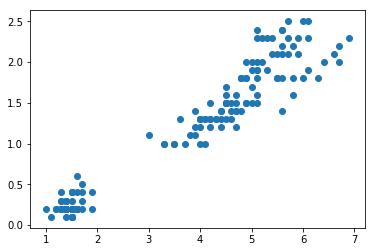

In [371]:
plt.scatter(x,y)
# iris.plot(x='petal_length', y='sepal_length', kind='scatter')

In [372]:
# establish boolean varable
isgood = iris.petal_length > 2.5
isgood[:5]

0    False
1    False
2    False
3    False
4    False
Name: petal_length, dtype: bool

In [374]:
# subset data
isgood = iris.petal_length > 2.5
x = iris.loc[isgood, 'petal_length'].reshape(-1,1)
y = iris.loc[isgood, 'petal_width']
x.shape, y.shape

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


((100, 1), (100,))

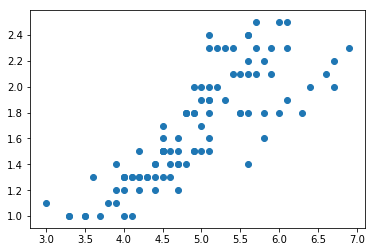

In [375]:
plt.scatter(x,y)

In [385]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
x_train[:5], y_train[:5]

(array([[ 3.5],
        [ 5. ],
        [ 6.9],
        [ 5. ],
        [ 3.6]]), 79     1.0
 146    1.9
 118    2.3
 113    2.0
 64     1.3
 Name: petal_width, dtype: float64)

In [386]:
# linear
model_l = LinearRegression()
model_l.fit(x, y)
model_l.coef_, model_l.intercept_

(array([ 0.4236207]), -0.40228316863377334)

In [424]:
# ridge 
model_r = Ridge(alpha=0.5)
model_r.fit(x_train, y_train)
model_r.coef_, model_r.intercept_

(array([ 0.40534478]), -0.32116047879894527)

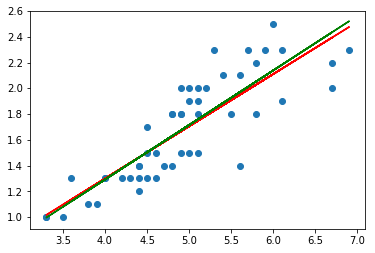

In [425]:
# plot linear vs ridge
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_r.coef_) + model_r.intercept_, color='red')
plt.plot(x_train, np.dot(x_train, model_l.coef_) + model_l.intercept_, color='green')

In [426]:
# MSE linear
error_test_l = mean_squared_error(y_test, np.dot(x_test, model_l.coef_) + model_l.intercept_)
error_train_l = mean_squared_error(y_train, np.dot(x_train, model_l.coef_) + model_l.intercept_)

error_test_l, error_train_l, (error_test_l - error_train_l)

(0.068248662161277104, 0.04682046541517923, 0.021428196746097875)

In [427]:
# MSE ridge
error_test_r = mean_squared_error(y_test, np.dot(x_test, model_r.coef_) + model_r.intercept_)
error_train_r = mean_squared_error(y_train, np.dot(x_train, model_r.coef_) + model_r.intercept_)

error_test_r, error_train_r, (error_test_r - error_train_r)

(0.069012070068685205, 0.046653640078338166, 0.02235842999034704)

In [86]:
alphas = pd.read_csv('../data/alphas.csv', skipinitialspace=True)
alphas.head()


,alpha,error_test_r,error_train_r,diff_r,Unnamed: 4
0,2,0.082404,0.082328,0.000076,NaN
1,3,0.082419,0.082332,0.000088,NaN
2,4,0.082436,0.082337,0.000100,NaN
3,5,0.082454,0.082343,0.000112,NaN


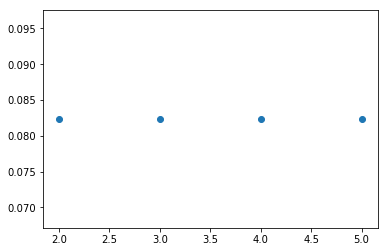

In [89]:
x = alphas['alpha']
y = alphas['error_train_r']
plt.scatter(x,y)

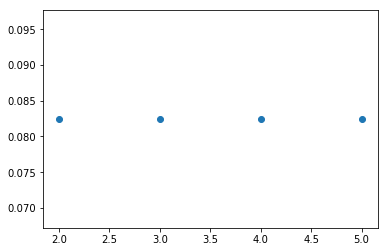

In [90]:
x = alphas['alpha']
y = alphas['error_test_r']
plt.scatter(x,y)

# Summary
It appears the superior model with the lowest MSE is the linear model without the ridge regression. Given that these data points follow a fairly straight line this is not surprising given the data shape. There is little detectable change on the graphs in mean squared error, as it changes only a miniscule amount with each alpha value.